<a href="https://colab.research.google.com/github/Sruthi-Shivaram/Data_Analytics/blob/main/Exp_DA_6/DA_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [20]:
data_set= pd.read_csv('/content/emails.csv')  
data_set.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [21]:
data_set.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [22]:
data_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [23]:
data_set.shape

(5728, 2)

In [24]:
data_set['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

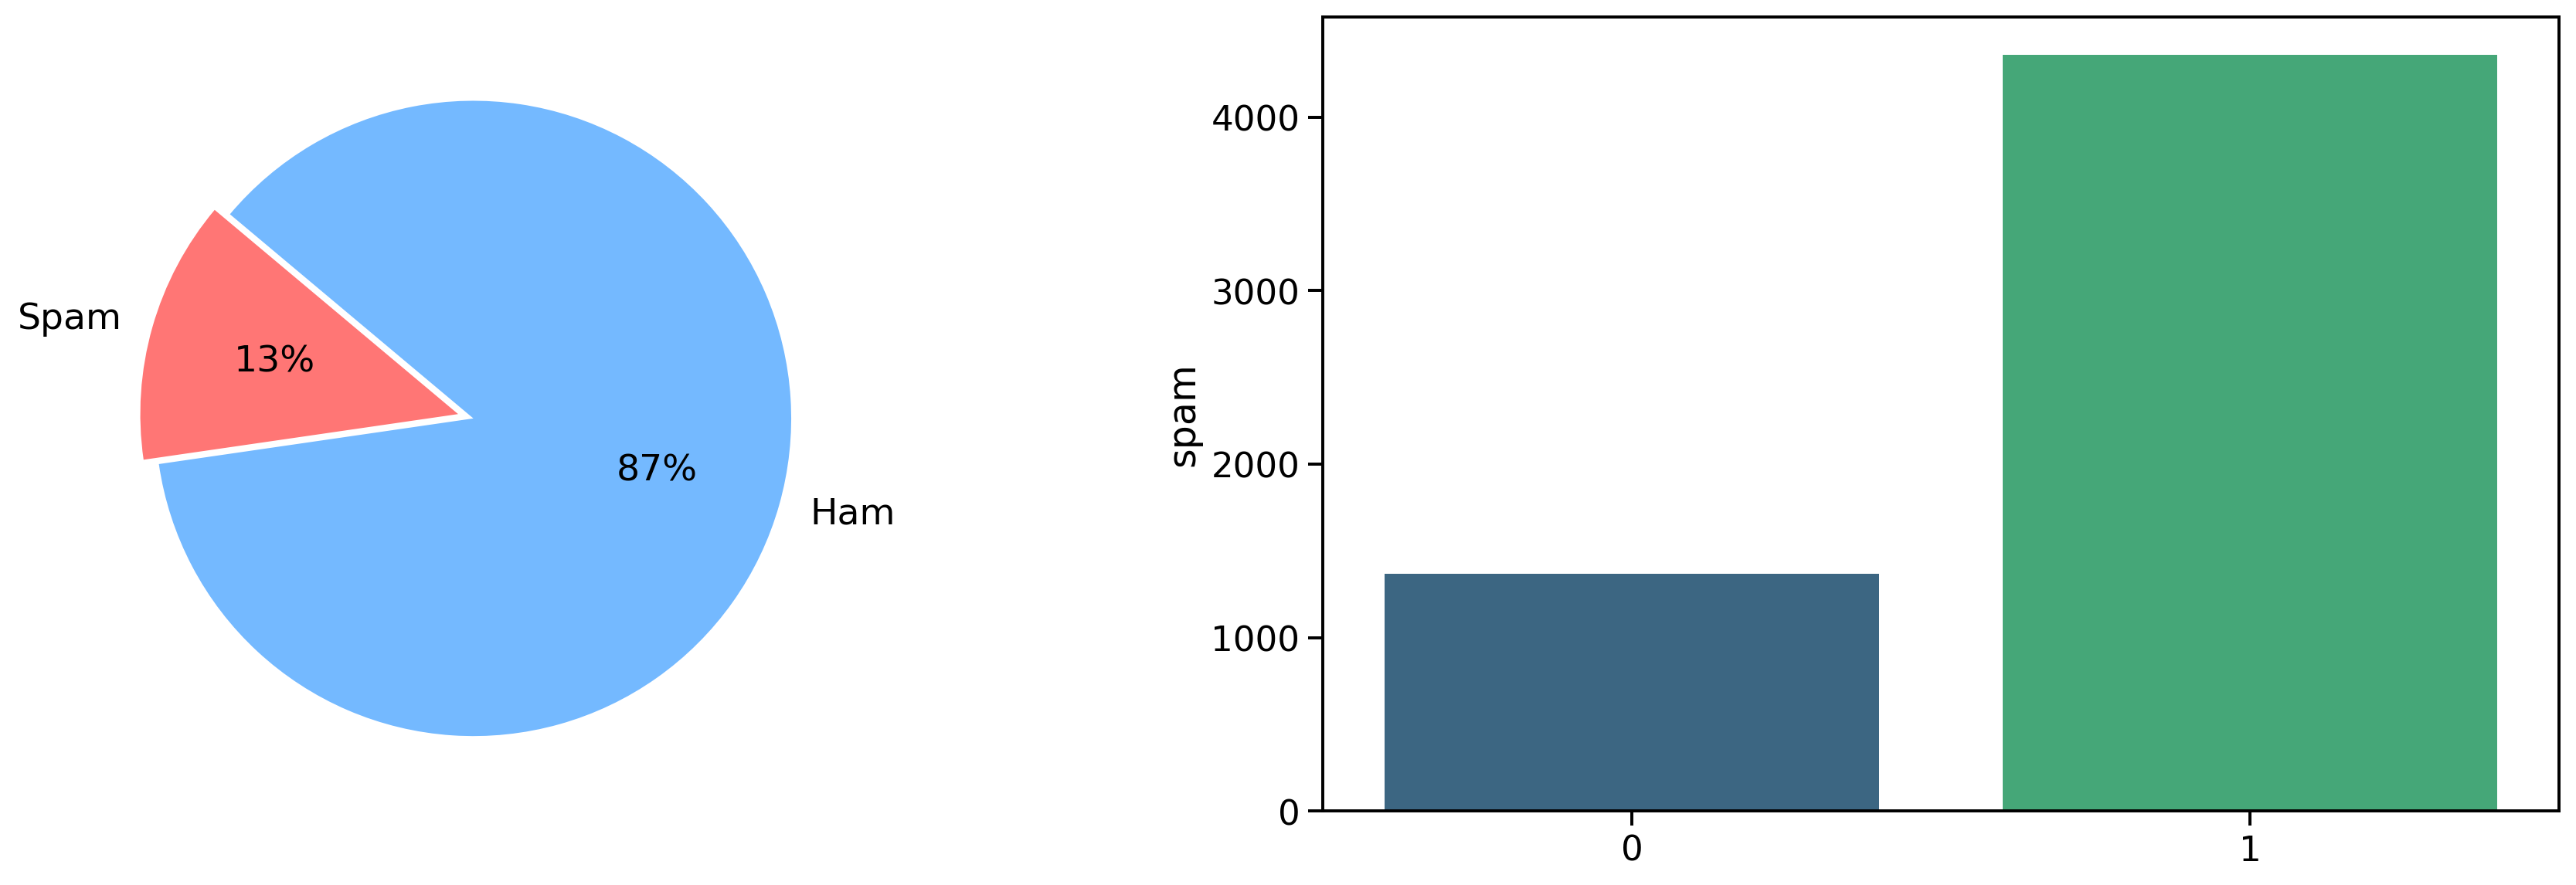

In [25]:
labels = ['Spam', 'Ham']
sizes = [747, 4825]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = data_set['spam'].unique(), y = data_set['spam'].value_counts(), palette= 'viridis')

plt.show()

In [26]:
data_set['Total Words'] = data_set['text'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

data_set['Total Chars'] = data_set["text"].apply(count_total_words)

In [29]:
data_set.head()

,text,spam,Total Words,Total Chars
0,Subject: naturally irresistible your corporate...,1,324,1143
1,Subject: the stock trading gunslinger fanny i...,1,89,506
2,Subject: unbelievable new homes made easy im ...,1,87,353
3,Subject: 4 color printing special request add...,1,98,396
4,"Subject: do not have money , get software cds ...",1,52,181


In [40]:
import string
data_set['text'] = data_set['text'].str.replace(r'[^\w\s]+', '')

data_set['text'] = data_set['text'].str.lower()
data_set.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,text,spam,Total Words,Total Chars
0,subject naturally irresistible your corporate ...,1,324,1143
1,subject the stock trading gunslinger fanny is...,1,89,506
2,subject unbelievable new homes made easy im w...,1,87,353
3,subject 4 color printing special request addi...,1,98,396
4,subject do not have money get software cds fr...,1,52,181


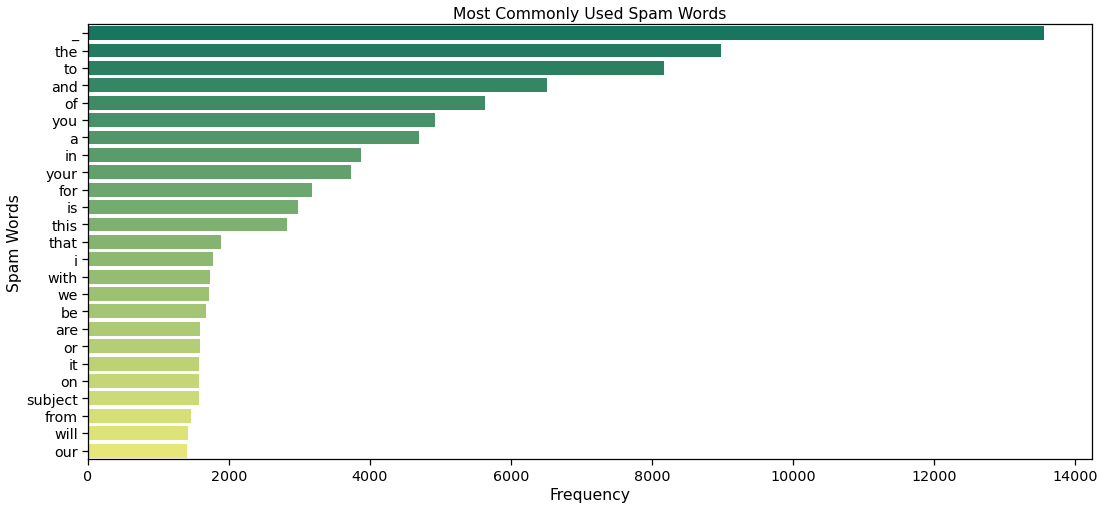

In [50]:
all_spam_words = []
for sentence in data_set[data_set['spam'] == 1]['text'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Spam Words")
plt.xlabel("Frequency")
plt.ylabel("Spam Words")
plt.show()

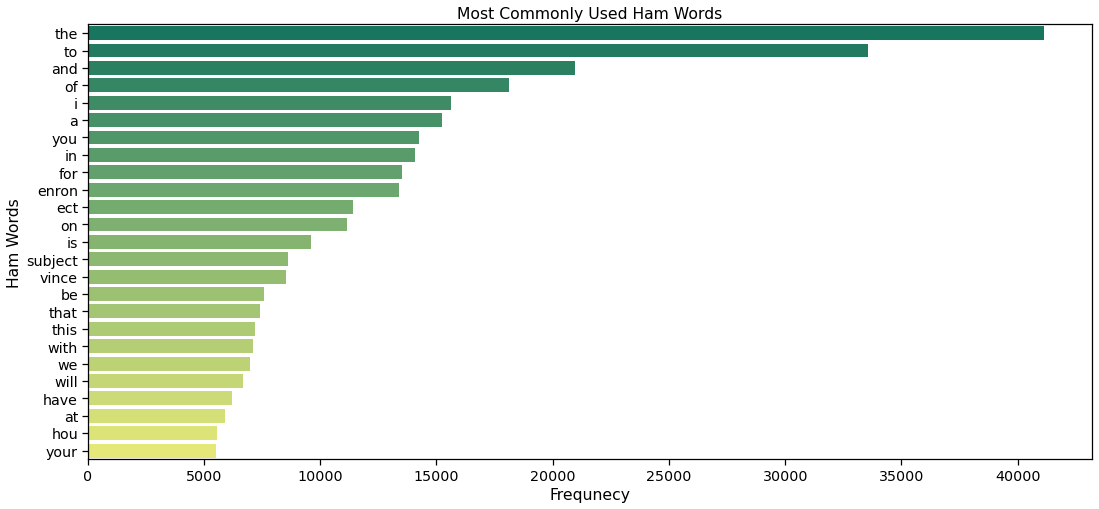

In [51]:
all_ham_words = []
for sentence in data_set[data_set['spam'] == 0]['text'].to_list():
    for word in sentence.split():
        all_ham_words.append(word)

df = pd.DataFrame(Counter(all_ham_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Ham Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_set['text'], data_set['spam'], random_state=1)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [46]:
word_freq_df = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [52]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predict= naive_bayes.predict(X_train_cv)
predictions = naive_bayes.predict(X_test_cv)

Text(85.18, 0.5, 'predicted label')

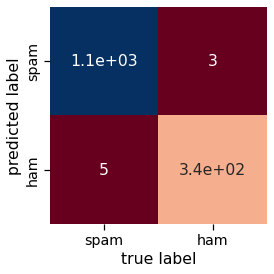

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['spam', 'ham'], yticklabels=['spam', 'ham'])
plt.xlabel('true label')
plt.ylabel('predicted label')


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('Train Accuracy score: ', accuracy_score(y_train, predict))
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions))
print('Recall score: ', recall_score(y_test, predictions))
print("F1 score: ",f1_score(y_test, predictions))

Train Accuracy score:  0.9955772811918063
Accuracy score:  0.994413407821229
Precision score:  0.9913544668587896
Recall score:  0.9856733524355301
F1 score:  0.9885057471264368


In [ ]:
# for decision tree models
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
clf = model.fit(X_train, y_train)
     
# Predict class labels on training data
pred_labels_tr = model.predict(X_train)
# Predict class labels on a test data
pred_labels_te = model.predict(X_test)